<a href="https://colab.research.google.com/github/Roghiehghahremani/PyTorch-Codemy/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Create a Model Class that inherits nn.Module

```
# This is formatted as code
```



In [108]:
class Model(nn.Module):
  def __init__(self,in_features =4, h1 = 8, h2=9,out_features=3):
    super().__init__()# instantiate our nn.Module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [109]:
# Pick a manual seed for randomization

torch.manual_seed(41)

In [110]:
model = Model()

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [113]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [114]:
my_df['variety'] =my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] =my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] =my_df['variety'].replace('Virginica' ,2.0)

my_df[51:55]

<ipython-input-114-7d34a3a1035e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] =my_df['variety'].replace('Virginica' ,2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0


In [115]:
#Train test split set X,y
X = my_df.drop('variety',axis = 1)
y = my_df['variety']

In [116]:
#Convert them to numpy array
X = X.values
y = y.values

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [119]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [120]:
# Convert y labels to long (64 bits)tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [121]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
#Choose adam optimizer, lr = learning rate (if error does not go down after a bunch of iterations(epochs))

optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)



In [122]:
# train our model
#epoch one run through all the training data in our network

epochs = 200
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)# Get predicted result
  # Measure the loss
  loss = criterion(y_pred,y_train)
  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 ==0:
    print(f'epoch: {i} , loss:{loss}')

  # Do some backpropagation

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



epoch: 0 , loss:1.125203251838684
epoch: 10 , loss:1.0097211599349976
epoch: 20 , loss:0.8162347674369812
epoch: 30 , loss:0.585993230342865
epoch: 40 , loss:0.4003389775753021
epoch: 50 , loss:0.26794716715812683
epoch: 60 , loss:0.1796349585056305
epoch: 70 , loss:0.12165623158216476
epoch: 80 , loss:0.0860651507973671
epoch: 90 , loss:0.06522614508867264
epoch: 100 , loss:0.05286872014403343
epoch: 110 , loss:0.04508011043071747
epoch: 120 , loss:0.03979310765862465
epoch: 130 , loss:0.03596426919102669
epoch: 140 , loss:0.03302799537777901
epoch: 150 , loss:0.030512524768710136
epoch: 160 , loss:0.02773350290954113
epoch: 170 , loss:0.024612102657556534
epoch: 180 , loss:0.02167237363755703
epoch: 190 , loss:0.01932021789252758


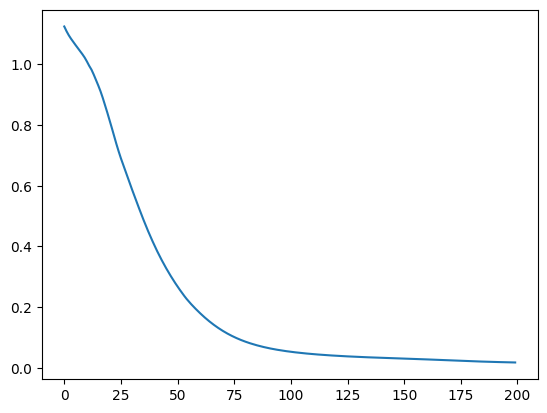

In [123]:
# Graph it out
plt.plot(range(epochs),losses)